Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


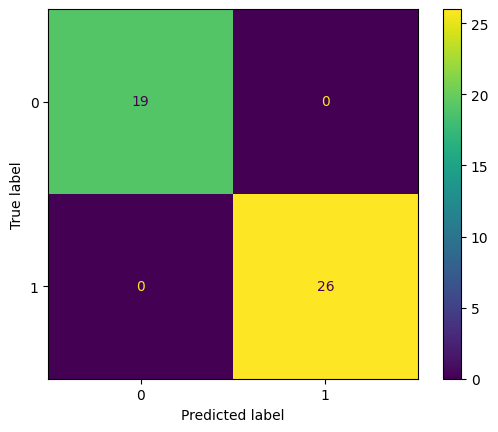

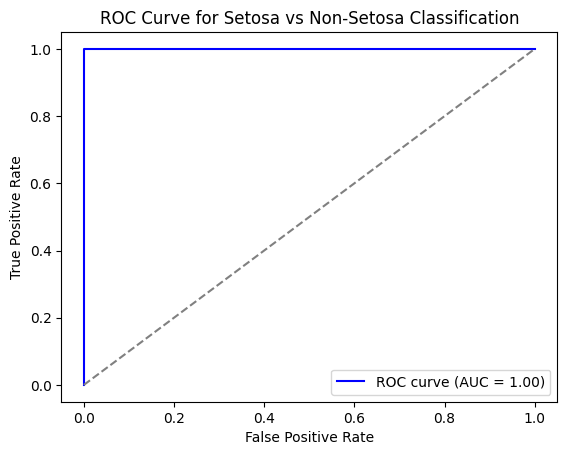

The accuracy, precision, recall, and F1-score is 1 for this model, showing that it can perfectly divide the data into two classes, setosa vs non-setosa.
This is further shown on the ROC curve which has 0% False Positive Rate and 100% True Positive Rate for across all discrimination thresholds.
This likely means that the dimensions of the petals and sepals between the two classes are very distinct.


In [46]:
# Problem 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import load_iris
from sklearn import metrics

# Load dataset
iris = load_iris() #load iris dataset from sklearn.datasets
df = pd.DataFrame(data=iris.data, columns=iris.feature_names) #convert to dataframe
df['species'] = iris.target #add target variable

# Binary encode target column
df['species'] = df['species'].map({0: 0, 1: 1, 2: 1}) #map species names to target numbers (set setosa to 0 and non-setosa to 1)
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]] #set feature columns
y = df["species"] #set target variable column

# Logistic Regression Model
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42) #split data into 30% testing data and 70% training data
model = LogisticRegression() # Set up logistic regression model
model.fit(Xtrain, ytrain) # Fit model to traning data
predictions = model.predict(Xtest) # Use trained model to predict y values with x test values

# Evaluate model by calculating metrics(accuracy, precision, recall, F1-score)
accuracy = accuracy_score(ytest, predictions) #accuracy
precision = precision_score(ytest, predictions) #precision
recall = recall_score(ytest, predictions) #recall
f1 = f1_score(ytest, predictions) #predictions

print(f'Accuracy: {accuracy}')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(ytest, predictions) # generate confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1]) #display confusion matrix in graphic
cm_display.plot()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(ytest, predictions) #calculate ROC curve
auc_score = roc_auc_score(ytest, predictions) #calculate area under the curve

# Plot ROC Curve
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})') #Add area under the curve to graph
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Setosa vs Non-Setosa Classification')
plt.legend()
plt.show()

# Interpretation

print("The accuracy, precision, recall, and F1-score is 1 for this model, showing that it can perfectly divide the data into two classes, setosa vs non-setosa.\nThis is further shown on the ROC curve which has 0% False Positive Rate and 100% True Positive Rate for across all discrimination thresholds.\nThis likely means that the dimensions of the petals and sepals between the two classes are very distinct.")


In [42]:
# Problem 2

from sklearn.datasets import load_wine
from sklearn.svm import SVC

wine = load_wine() #load wine dataset from sklearn.datasets
X = wine.data #set x equal to feature columns
y = wine.target #set y equal to target column

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42) #split data into 25% testing data and 75% training data

# Train three SVM models
model_linear = SVC(kernel="linear") #linear SVM, choose C=1 default
model_linear.fit(Xtrain,ytrain) #fit data to model
model_RBF = SVC(kernel='rbf')#RBF SVM
model_RBF.fit(Xtrain, ytrain) #fit data to model
model_polynomial = SVC(kernel="poly") #Polynomial SVM
model_polynomial.fit(Xtrain,ytrain) #fit data to model

# Predict using SVM models
predictions_linear = model_linear.predict(Xtest)
predictions_RBF = model_RBF.predict(Xtest)
predictions_polynomial = model_polynomial.predict(Xtest)

# Evaluate models by calculating metrics(accuracy, precision, recall, F1-score)
accuracy_linear = accuracy_score(ytest, predictions_linear) #accuracy
precision_linear= precision_score(ytest, predictions_linear, average="weighted") #precision (picked weighted for average sice its multiclass)
recall_linear = recall_score(ytest, predictions_linear, average="weighted") #recall
f1_linear = f1_score(ytest, predictions_linear, average="weighted") #predictions

accuracy_RBF = accuracy_score(ytest, predictions_RBF) #accuracy
precision_RBF= precision_score(ytest, predictions_RBF, average="weighted") #precision
recall_RBF = recall_score(ytest, predictions_RBF, average="weighted") #recall
f1_RBF = f1_score(ytest, predictions_RBF, average="weighted") #predictions

accuracy_polynomial = accuracy_score(ytest, predictions_polynomial) #accuracy
precision_polynomial= precision_score(ytest, predictions_polynomial, average="weighted") #precision
recall_polynomial = recall_score(ytest, predictions_polynomial, average="weighted") #recall
f1_polynomial = f1_score(ytest, predictions_polynomial, average="weighted") #predictions

# Compare model metrics
print(f'Accuracy of Linear Model: {accuracy_linear} vs Accuracy of RBF Model: {accuracy_RBF} vs Accuracy of Polynomial Model: {accuracy_polynomial} ')
print(f'Precision of Linear Model: {precision_linear} vs Precision of RBF Model: {precision_RBF} vs Precision of Polynomial Model: {precision_polynomial} ')
print(f'Recall of Linear Model: {recall_linear} vs Recall of RBF Model: {recall_RBF} vs Recall of Polynomial Model: {recall_polynomial} ')
print(f'F1-Score of Linear Model: {f1_linear} vs F1-Score of RBF Model: {f1_RBF} vs F1-Score of Polynomial Model: {f1_polynomial} ')

# Interpretation
print("The SVM model with linear kernel had the highest values of accuracy, precision, recall, and F1.\nThe polynomial model performed second best, and the RBF model was the worst.\nThis means that the best way to separate the data into classes is a linear line.\nAdditionally, using a rbf (Gaussian function) method to separate data into classes is worst method.")

Accuracy of Linear Model: 0.9777777777777777 vs Accuracy of RBF Model: 0.7111111111111111 vs Accuracy of Polynomial Model: 0.7555555555555555 
Precision of Linear Model: 0.9794871794871796 vs Precision of RBF Model: 0.6994708994708995 vs Precision of Polynomial Model: 0.7518162393162394 
Recall of Linear Model: 0.9777777777777777 vs Recall of RBF Model: 0.7111111111111111 vs Recall of Polynomial Model: 0.7555555555555555 
F1-Score of Linear Model: 0.9779047619047617 vs F1-Score of RBF Model: 0.7015873015873015 vs F1-Score of Polynomial Model: 0.7027826653633105 
The SVM model with linear kernel had the highest values of accuracy, precision, recall, and F1.
The polynomial model performed second best, and the RBF model was the worst.
This means that the best way to separate the data into classes is a linear line.
Additionally, using a rbf (Gaussian function) method to separate data into classes is worst method.
